## High-z galaxies with Te measurements
# Colect data

In [1]:
## Global stuff
%matplotlib notebook
import matplotlib.pylab as plt
import numpy as np
from astropy.table import Table
plt.rcParams.update({'font.size': 12})

In [2]:
## Lines to be used
line_names = ['OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729','OIITot',
              'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584']

#Probably there is a smart way of doing this with PyNeb
super_wav = {
    'OIII1661': 1661,
    'OIII1666': 1666,
    'NIII1750': 1750,
    'CIII1907': 1907,
    'CIII1909': 1909,
    'NeIII3869': 3869,
    'OII3727': 3727,
    'OII3729': 3729,
    'OIITot': 3729,
    'Hd': 4102,
    'Hg': 4340,
    'OIII4363': 4363,
    'Hb': 4861,
    'OIII4959': 4959,
    'OIII5007': 5007,
    'Ha': 6563,
    'NII6584': 6584
    }

### Data available in the literature

In [3]:
#initiate parameter lists (easier to append stuff)
Name = []
ref = []
z = []
coord = []
LogMass = []
SFR = []
Te = []
MetTe = []
supTe = []
infTe = []
supMetTe = []
infMetTe = []

#line fluxes
OIII1661= []
OIII1666= []
NIII1750= []
CIII1906 = []
CIII1907 = []
CIII1909 = []
OII3727= []
OII3729= []
OIITot = []
NeIII3869 = []
Hd = []
Hg = []
OIII4363= []
Hb = []
OIII4959= []
OIII5007= []
Ha = []
NII6584= []

# flux errors
eOIII1661 = []
eOIII1666= []
eNIII1750= []
eCIII1907 = []
eCIII1909 = []
eOII3727= []
eOII3729= []
eOIITot = []
eNeIII3869 = []
eHd = []
eHg = []
eOIII4363= []
eHb = []
eOIII4959= []
eOIII5007= []
eHa = []
eNII6584= []

In [4]:
#### Compilation from Kojima+17 (Table 2 and 3)
Name_K = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(1),dtype='str')

# Galaxy properties
z_K,LogMass_K,SFR_K,Te_K,MetTe_K = np.genfromtxt('tables_from_papers/kojima_tab2',unpack=True,usecols=(2,3,5,6,9))
supTe_K,infTe_K,supMetTe_K,infMetTe_K = np.genfromtxt('tables_from_papers/kojima_tab2',unpack=True,usecols=(7,8,10,11))

# right units in Te
Te_K *= 1e4
supTe_K *=1e4
infTe_K *= 1e4

# Line fluxes
OIII1661_K,OIII1666_K,NIII1750_K,OIITot_K,OIII4363_K,OIII4959_K,OIII5007_K,NII6584_K\
    = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(2,4,8,10,12,14,16,20))
eOIII1661_K,eOIII1666_K,eNIII1750_K,eOIITot_K,eOIII4363_K,eOIII4959_K,eOIII5007_K,eNII6584_K\
    = np.genfromtxt('tables_from_papers/kojima_tab3',unpack=True,usecols=(3,5,9,11,13,15,17,21))

# H beta is useless here, since all lines have been normalised to it
Hd_K,Hg_K,Hb_K,Ha_K,eHd_K,eHg_K,eHb_K,eHa_K = np.genfromtxt('tables_from_papers/kojima_tab4', unpack=True, 
                                                            usecols=(2,4,6,8,3,5,7,9))

ref_K = ['Kojima2017','Christensen2012a,b','Erb2016','Erb2016','Erb2016','Villar-Martin2004','Yuan2009','Bayliss2014',
         'James2014','Stark2014','Stark2014','Steidel2016']


coord_K = [ 
    "12h30m25.3s 15d15m58.1s", #COSMOS_12805
    "03h04m20.29s -44d02m27.8s", #SMACS_0304
    "02h09m43.154s -00d05m50.208s",#BX74
    "23h46m18.571s 12d47m47.364s", #BX418
    "23h46m29.434s 12d49m45.552s", #BX660
    "08h48m48976 44d55m049.6s", #the_Lynx_arc
    "13h11m32.4150s -1d21m15.917s",#Abell_22.3
    "10h50m39.6s 00d17m30", #SGAS_1050
    "14h41m49.1537s 14d41m20.5747s",#CSWA20
    "04h51m53.399s 00d06m40.31s",#MACS_0451',
    "13h11m26.426s -01d21m31.22s",#Abell_860_359
    "None"] #S16-stack

In [5]:
## Manually add NeIII3869,OIII3729 and CIII1909 whenever available

    #CIII1907 CIII1909 OIII3727 OII3729 NeIII Hb  
new_data = np.array((
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # COSMOS12805
    (np.nan,np.nan,437.8,587.2,149.9,500.0),# SMACS0304
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX74 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX418 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX660 Only show ratios
    (0.35,0.24,np.nan,np.nan,0.69,1.), # the Lynx arc 
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 22.3 not available
    (1.14,0.69,2.26,2.22,1.83,5.71),   #SGAS 1050
    (0.12,0.11,0.47,0.52,0.37,1.), #CSWA20
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # MACS0451 Not available. But is has the Si1883,1892 doublet 0.2±0.1,0.2±0.1
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 860_359 Not available. But is has the Si1883,1892 doublet 0.1±0.1,0.1±0.1
    (0.173,0.119,2.25,2.38,0.66,2.15) # Steidel 2016 stack
))

new_errors = np.array((
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan),# COSMOS12805
    (np.nan,np.nan,3.4,3.9,3.8,0.9),# SMACS0304
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), #BX74 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX418 Only show ratios
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # BX660 Only show ratios
    (0.1,0.1,np.nan,np.nan,0.3,0.3), # the lynx arc Only gives approximate errors
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 22.3 not available
    (0.07,0.08,0.06,0.06,0.04,0.06),    #SGAS 1050
    (0.01,0.01,0.02,0.03,0.02,0.07), # CSWA20
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # MACS0451
    (np.nan,np.nan,np.nan,np.nan,np.nan,np.nan), # Abell 860_359   
    (0.006,0.006,0.05,0.06,0.05,0.04) # Steidel 2016 stack
))  

CIII1907_K = np.zeros_like(Hb_K)
CIII1909_K= np.zeros_like(Hb_K)
OII3727_K= np.zeros_like(Hb_K)
OII3729_K= np.zeros_like(Hb_K)
NeIII3869_K = np.zeros_like(Hb_K)
eCIII1907_K= np.zeros_like(Hb_K)
eCIII1909_K= np.zeros_like(Hb_K)
eOII3727_K= np.zeros_like(Hb_K)
eOII3729_K= np.zeros_like(Hb_K)
eNeIII3869_K= np.zeros_like(Hb_K)

for i,(f,e) in enumerate(zip(new_data,new_errors)):
    f  = [x/f[5] for x in f] # normalise to Hbeta
    e  = [x/f[5] for x in e] # error of Hb should also be propagated
    CIII1907_K[i],  CIII1909_K[i],  OII3727_K[i],  OII3729_K[i], NeIII3869_K[i] = f[:-1]
    eCIII1907_K[i], eCIII1909_K[i], eOII3727_K[i], eOII3729_K[i], eNeIII3869_K[i] = e[:-1]   

In [6]:
## Fill in 
Name.extend(Name_K)
ref.extend(ref_K)
z.extend(z_K)
coord.extend(coord_K)
LogMass.extend(LogMass_K)
SFR.extend(SFR_K)
Te.extend(Te_K)
MetTe.extend(MetTe_K)
supTe.extend(supTe_K)
infTe.extend(infTe_K)
supMetTe.extend(supMetTe_K)
infMetTe.extend(infMetTe_K)

#line fluxes
OIII1661.extend(OIII1661_K)
OIII1666.extend(OIII1666_K)
NIII1750.extend(NIII1750_K)
CIII1907.extend(CIII1907_K)
CIII1909.extend(CIII1909_K)
OII3727.extend(OII3727_K)
OII3729.extend(OII3729_K)
OIITot.extend(OIITot_K)
NeIII3869.extend(NeIII3869_K)
Hd.extend(Hd_K)
Hg.extend(Hg_K)
OIII4363.extend(OIII4363_K)
Hb.extend(Hb_K)
OIII4959.extend(OIII4959_K)
OIII5007.extend(OIII5007_K)
Ha.extend(Ha_K)
NII6584.extend(NII6584_K)

# flux errors
eOIII1661.extend(eOIII1661_K)
eOIII1666.extend(eOIII1666_K)
eNIII1750.extend(eNIII1750_K)
eCIII1907.extend(eCIII1907_K)
eCIII1909.extend(eCIII1909_K)
eOII3727.extend(eOII3727_K)
eOII3729.extend(eOII3729_K)
eOIITot.extend(eOIITot_K)
eNeIII3869.extend(eNeIII3869_K)
eHd.extend(eHd_K)
eHg.extend(eHg_K)
eOIII4363.extend(eOIII4363_K)
eOIII4959.extend(eOIII4959_K)
eHb.extend(eHb_K)
eOIII5007.extend(eOIII5007_K)
eHa.extend(eHa_K)
eNII6584.extend(eNII6584_K)

In [7]:
#### Christensen 2012 a and b
ref.extend(['Christensen2012a,b','Christensen2012a,b'])
Name.extend(['SMACS_2031','A1689_31.1'])
coord.extend(["20h31m52.89s -40d37m32.6s","13h11m30.42s -01d19m51.5s"])

z.extend([3.5,1.8])
LogMass.extend([9.16,7.70])
SFR.extend([18.0,1.0])
Te.extend([16100,21600])
MetTe.extend([7.76,7.69])

supTe.extend([300,3000])
infTe.extend([300,3000])
supMetTe.extend([0.03,0.13])
infMetTe.extend([0.03,0.13])

# fluxes
OIII1661.extend([2.9,3.2])
OIII1666.extend([8.8,7.4])
NIII1750.extend([np.nan,np.nan])
CIII1907.extend([12.0,4.7])
CIII1909.extend([8.4,9.1])
OII3727.extend([14.4,9.2])
OII3729.extend([15.5,11.7])
OIITot.extend([14.4+15.5,9.2+11.7])
NeIII3869.extend([14.8,6.4])
Hd.extend([np.nan,np.nan])
Hg.extend([np.nan,17.0])
OIII4363.extend([np.nan,6.2])
Hb.extend([42.8,42.7])
OIII4959.extend([61.9,63.0])
OIII5007.extend([205.2,211.5])
Ha.extend([np.nan,np.nan])
NII6584.extend([np.nan,np.nan])

# errors
eOIII1661.extend([0.6,0.4])
eOIII1666.extend([0.7,0.3])
eNIII1750.extend([np.nan,np.nan])
eCIII1907.extend([0.5,0.4])
eCIII1909.extend([0.9,0.4])
eOII3727.extend([1.6,0.8])
eOII3729.extend([1.3,0.9])
eOIITot.extend([1.6+1.3,0.8+0.9])
eNeIII3869.extend([2.1,2.5])
eHd.extend([np.nan,np.nan])
eHg.extend([np.nan,2.1])
eOIII4363.extend([np.nan,1.8])
eHb.extend([1.5,4.9])
eOIII4959.extend([0.9,10.6])
eOIII5007.extend([0.5,5.7])
eHa.extend([np.nan,np.nan])
eNII6584.extend([np.nan,np.nan])

In [7]:
#### Atek 2011
# line fluxes not available and galaxy is at "low" redshift (z=0.7)

In [8]:
#### Brammer 2012
# Only has fluxes of a couple of lines. OII mising, for example

In [8]:
#### Maseda 2014
# Michael sent us his flux measurements
ref.extend(['Maseda2014','Maseda2014'])
Name.extend(['UDS-6377','UDS-12539'])
coord.extend(["02h17m42.8568s -05d15m19.152s","02h17m53.7336s -05d14m03.228s"])

z.extend([1.664,1.621])
LogMass.extend([8.32,8.67])
SFR.extend([10**1.08,10**1.29]) 
Te.extend([np.nan,np.nan])
MetTe.extend([7.52,7.45])

supTe.extend([np.nan,np.nan]) # between Av=0 and Av=1.4
infTe.extend([np.nan,np.nan])
supMetTe.extend([0.37,0.09])
infMetTe.extend([0.37,0.09])

# fluxes
OIII1661.extend([np.nan,np.nan])
OIII1666.extend([np.nan,np.nan])
NIII1750.extend([np.nan,np.nan])
CIII1907.extend([np.nan,np.nan])
CIII1909.extend([np.nan,np.nan])
OII3727.extend([8.57055e-19,7.35208e-17])
OII3729.extend([8.38026e-18,8.08939e-17])
OIITot.extend([8.57055e-19+8.38026e-18,7.35208e-17+8.08939e-17])
NeIII3869.extend([3.77915e-18,3.29065e-17])
Hd.extend([np.nan,np.nan])
Hg.extend([3.98594e-18,2.93660e-17])
OIII4363.extend([5.23006e-18,3.95775e-17])
Hb.extend([5.03657e-18,1.20361e-16])
OIII4959.extend([np.nan,np.nan])
OIII5007.extend([3.33684e-17,5.72444e-16])
Ha.extend([1.93424e-17,4.07651e-16])
NII6584.extend([-1.92051e-18,1.79054e-17])


# errors
eOIII1661.extend([np.nan,np.nan])
eOIII1666.extend([np.nan,np.nan])
eNIII1750.extend([np.nan,np.nan])
eCIII1907.extend([np.nan,np.nan])
eCIII1909.extend([np.nan,np.nan])
eOII3727.extend([1.98861e-18,2.50988e-17])
eOII3729.extend([1.96377e-18,2.89959e-17])
eOIITot.extend([1.98861e-18+1.96377e-18,2.50988e-17+2.89959e-17])
eNeIII3869.extend([2.63884e-18,6.27673e-18])
eHd.extend([np.nan,np.nan])
eHg.extend([1.27652e-18,2.29637e-18])
eOIII4363.extend([1.54290e-18,3.30824e-18])
eHb.extend([8.57792e-19,3.69689e-18])
eOIII4959.extend([np.nan,np.nan])
eOIII5007.extend([1.07353e-18,3.23380e-18])
eHa.extend([4.66379e-19,1.32121e-18])
eNII6584.extend([7.42037e-19,1.34166e-18])


## Extra lines
#Line		Flux:UDS-6	Err:UDS-6	Flux:UDS-12	Err:UDS-12
#NII_6548	-6.40170e-19	2.47346e-19	5.96847e-18	4.47221e-19
#NII_6583	-1.92051e-18	7.42037e-19	1.79054e-17	1.34166e-18
#SII_6717	-7.65738e-18	5.86031e-19	2.67621e-17	1.03011e-18
#SII_6731	6.98868e-18	5.65255e-19	1.82712e-17	1.17262e-18				

In [9]:
#### Rigby 2011
# also has [N II] 6548
ref.extend(['Rigby2011'])
Name.extend(['RCSGA']) #RCSGA_032727-132609
coord.extend(["03h27m27s -13d26m09s"])

z.extend([1.7037])
LogMass.extend([10.0])
SFR.extend([106]) # complicated!
Te.extend([11140]) # also complicated. Apparently there is no good handle of the extinction. This value is for Av=0  
MetTe.extend([8.21])

supTe.extend([1200]) # between Av=0 and Av=1.4
infTe.extend([0])
supMetTe.extend([0])
infMetTe.extend([0.07])

# fluxes
OIII1661.extend([np.nan])
OIII1666.extend([np.nan])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([np.nan])
OII3727.extend([np.nan])
OII3729.extend([np.nan])
OIITot.extend([72.])
NeIII3869.extend([7.8])
Hd.extend([7.1])
Hg.extend([13.5])
OIII4363.extend([1.5])
Hb.extend([32.4])
OIII4959.extend([49.3])
OIII5007.extend([159])
Ha.extend([116])
NII6584.extend([7.4])

# errors
eOIII1661.extend([np.nan])
eOIII1666.extend([np.nan])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([np.nan])
eOII3727.extend([np.nan])
eOII3729.extend([np.nan])
eOIITot.extend([0.2])
eNeIII3869.extend([1.3])
eHd.extend([1.7])
eHg.extend([2.])
eOIII4363.extend([np.nan])
eHb.extend([1.1])
eOIII4959.extend([1.6])
eOIII5007.extend([1.4])
eHa.extend([1.2])
eNII6584.extend([1.2])

In [10]:
#### De Barros 2016 
# Overall, the spectra doesn't seem to have very high S/N
# detections of OII1661: Marginal detections (Figure 6): S/N(O iii]1666)~1.7, S/N(He ii]1640)~2, and S/N(Hbeta)~2
# also has N v 1240,C iv 1550, He ii 1640 and C iii] 1909
# Does not have enough Balmer lines. Not included

'''
ref.extend(['DeBarros2016'])
Name.extend(['Ion2'])

z.extend([3.212])
LogMass.extend([9.5])
SFR.extend([40]) # not corrected for dust attenuation. Only one Blamer line available. see their Appendix A
Te.extend([np.nan]) # does not say? Uses HII-CHI-mistry 
MetTe.extend([8.07]) # using all lines. without OII1661 it's 7.79

supTe.extend([np.nan]) # between Av=0 and Av=1.4
infTe.extend([np.nan])
supMetTe.extend([0.44])
infMetTe.extend([0.44])
                    
# fluxes
OIII1661.extend([0.5])
OIII1666.extend([0])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([1.3])
OII3727.extend([np.nan])
OII3729.extend([np.nan])
OIITot.extend([1.5])
NeIII3869.extend([np.nan])
Hd.extend([np.nan])
Hg.extend([np.nan])
OIII4363.extend([np.nan])
Hb.extend([1.5])
OIII4959.extend([5.4])
OIII5007.extend([22.1])
Ha.extend([np.nan])
NII6584.extend([np.nan])

# errors
eOIII1661.extend([0.3])
eOIII1666.extend([0])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([0.3])
eOII3727.extend([np.nan])
eOII3729.extend([np.nan])
eOIITot.extend([1.5])
eNeIII3869.extend([np.nan])
eHd.extend([np.nan])
eHg.extend([np.nan])
eOIII4363.extend([np.nan])
eHb.extend([0.8])
eOIII4959.extend([0.8])
eOIII5007.extend([0.8])
eHa.extend([np.nan])
eNII6584.extend([np.nan])
'''

"\nref.extend(['DeBarros2016'])\nName.extend(['Ion2'])\n\nz.extend([3.212])\nLogMass.extend([9.5])\nSFR.extend([40]) # not corrected for dust attenuation. Only one Blamer line available. see their Appendix A\nTe.extend([np.nan]) # does not say? Uses HII-CHI-mistry \nMetTe.extend([8.07]) # using all lines. without OII1661 it's 7.79\n\nsupTe.extend([np.nan]) # between Av=0 and Av=1.4\ninfTe.extend([np.nan])\nsupMetTe.extend([0.44])\ninfMetTe.extend([0.44])\n                    \n# fluxes\nOIII1661.extend([0.5])\nOIII1666.extend([0])\nNIII1750.extend([np.nan])\nCIII1907.extend([np.nan])\nCIII1909.extend([1.3])\nOII3727.extend([np.nan])\nOII3729.extend([np.nan])\nOIITot.extend([1.5])\nNeIII3869.extend([np.nan])\nHd.extend([np.nan])\nHg.extend([np.nan])\nOIII4363.extend([np.nan])\nHb.extend([1.5])\nOIII4959.extend([5.4])\nOIII5007.extend([22.1])\nHa.extend([np.nan])\nNII6584.extend([np.nan])\n\n# errors\neOIII1661.extend([0.3])\neOIII1666.extend([0])\neNIII1750.extend([np.nan])\neCIII1907.e

In [10]:
# Sanders 2016
# low density: ne~500 cm^-2
ref.extend(['Sanders2016'])
Name.extend(['COSMOS-1908'])
coord.extend(["10h00m23.36s 02d11m055.9s"])

z.extend([3.0768])
LogMass.extend([9.3])
SFR.extend([49]) # not corrected for dust attenuation. Only one Blamer line available. see their Appendix A
Te.extend([12800]) # does not say? Uses HII-CHI-mistry 
MetTe.extend([8.00]) # using all lines. without OII1661 it's 7.79

supTe.extend([1950]) # between Av=0 and Av=1.4
infTe.extend([1400])
supMetTe.extend([0.13])
infMetTe.extend([0.14])
                    
# fluxes
OIII1661.extend([np.nan])
OIII1666.extend([np.nan])
NIII1750.extend([np.nan])
CIII1907.extend([np.nan])
CIII1909.extend([np.nan])
OII3727.extend([1.09])
OII3729.extend([1.09])
OIITot.extend([1.09+1.09])
NeIII3869.extend([1.84])
Hd.extend([1.49])
Hg.extend([2.21])
OIII4363.extend([0.56])
Hb.extend([4.72])
OIII4959.extend([10.8])
OIII5007.extend([33.3])
Ha.extend([np.nan])
NII6584.extend([np.nan])

# errors
eOIII1661.extend([np.nan])
eOIII1666.extend([np.nan])
eNIII1750.extend([np.nan])
eCIII1907.extend([np.nan])
eCIII1909.extend([np.nan])
eOII3727.extend([0.19])
eOII3729.extend([0.18])
eOIITot.extend([0.19+0.18])
eNeIII3869.extend([0.21])
eHd.extend([0.32])
eHg.extend([0.34])
eOIII4363.extend([0.14])
eHb.extend([0.25])
eOIII4959.extend([0.28])
eOIII5007.extend([0.70])
eHa.extend([np.nan])
eNII6584.extend([np.nan])

### Save all data in single file

In [11]:
fluxes = Table([Name,z,ref, 
            OIII1661, OIII1666, NIII1750, CIII1907, CIII1909, NeIII3869, OII3727, OII3729, OIITot, Hd, Hg, 
            OIII4363, Hb, OIII4959, OIII5007, Ha, NII6584,
            eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,
            eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584], 
          names=('Name','z','Ref', 
            'OIII1661','OIII1666','NIII1750','CIII1907','CIII1909','NeIII3869','OII3727','OII3729', 'OIITot',
            'Hd','Hg','OIII4363','Hb','OIII4959','OIII5007','Ha','NII6584',
            'eOIII1661','eOIII1666','eNIII1750','eCIII1907','eCIII1909','eNeIII3869','eOII3727','eOII3729', 'eOIITot',
            'eHd','eHg','eOIII4363','eHb','eOIII4959','eOIII5007','eHa','eNII6584'))   
# remove lynx arc and smacs2031 because they don't have at least two balmer lines
fluxes.remove_rows([5,12])

# Sort by redshift and add ID
fluxes.sort('z')
fluxes.add_index('Name')

# Save
fluxes.write('data.dat',format='ascii.fixed_width_two_line')
fluxes.show_in_notebook()

idx,Name,z,Ref,OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,CSWA20,1.433,James2014,0.04,0.1,nan,0.12,0.11,0.37,0.47,0.52,0.47,nan,0.57,0.05,1.0,1.67,4.97,3.32,0.06,0.04,0.04,nan,0.01,0.01,0.02,0.02,0.03,0.2,nan,0.05,0.03,0.07,0.1,0.29,0.2,0.02
1,UDS-12539,1.621,Maseda2014,nan,nan,nan,nan,nan,3.29065e-17,7.35208e-17,8.08939e-17,1.544147e-16,nan,2.9366e-17,3.95775e-17,1.20361e-16,nan,5.72444e-16,4.07651e-16,1.79054e-17,nan,nan,nan,nan,nan,6.27673e-18,2.50988e-17,2.89959e-17,5.40947e-17,nan,2.29637e-18,3.30824e-18,3.69689e-18,nan,3.2338e-18,1.32121e-18,1.34166e-18
2,UDS-6377,1.664,Maseda2014,nan,nan,nan,nan,nan,3.77915e-18,8.57055e-19,8.38026e-18,9.237315e-18,nan,3.98594e-18,5.23006e-18,5.03657e-18,nan,3.33684e-17,1.93424e-17,-1.92051e-18,nan,nan,nan,nan,nan,2.63884e-18,1.98861e-18,1.96377e-18,3.95238e-18,nan,1.27652e-18,1.5429e-18,8.57792e-19,nan,1.07353e-18,4.66379e-19,7.42037e-19
3,Abell_860_359,1.702,Stark2014,0.03,0.083,0.03,nan,nan,nan,nan,nan,1.2,nan,nan,nan,1.0,2.03,6.12,2.97,nan,nan,0.029,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.03,0.03,0.1,0.03,nan
4,Abell_22.3,1.703,Yuan2009,nan,nan,nan,nan,nan,nan,nan,nan,1.11,nan,nan,0.27,1.0,1.98,6.45,5.03,0.05,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,nan
5,RCSGA,1.7037,Rigby2011,nan,nan,nan,nan,nan,7.8,nan,nan,72.0,7.1,13.5,1.5,32.4,49.3,159.0,116.0,7.4,nan,nan,nan,nan,nan,1.3,nan,nan,0.2,1.7,2.0,nan,1.1,1.6,1.4,1.2,1.2
6,A1689_31.1,1.8,"Christensen2012a,b",3.2,7.4,nan,4.7,9.1,6.4,9.2,11.7,20.9,nan,17.0,6.2,42.7,63.0,211.5,nan,nan,0.4,0.3,nan,0.4,0.4,2.5,0.8,0.9,1.7,nan,2.1,1.8,4.9,10.6,5.7,nan,nan
7,SMACS_0304,1.963,"Christensen2012a,b",0.014,0.023,nan,nan,nan,0.2998,0.8756,1.1744,2.1,0.257,0.412,nan,1.0,1.339,4.714,3.604,0.116,0.003,0.004,nan,nan,nan,3.8,3.4,3.9,0.02,0.005,0.003,nan,0.002,0.004,0.007,0.001,0.005
8,MACS_0451,2.06,Stark2014,0.2,0.3,0.1,nan,nan,nan,nan,nan,0.63,nan,nan,nan,1.0,1.37,3.95,2.58,0.065,0.1,0.1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.1,0.05,0.05,0.16,nan
9,COSMOS_12805,2.159,Kojima2017,0.049,0.075,0.042,nan,nan,nan,nan,nan,2.9,nan,nan,nan,1.0,1.89,6.46,2.84,0.1,0.012,0.015,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.3,0.42,0.29,0.05,nan


### Save galaxy Properties

In [12]:
properties = Table([Name, coord , ref,z,LogMass,SFR,Te, supTe,infTe,MetTe,supMetTe,infMetTe],
            names=('Name','RaDec','ref','z','LogMass','SFR','Te','supTe','infTe','MetTe','supMetTe','infMetTe'))   
properties.remove_rows([5,12])

# Sort by redshift
properties.sort('z')

# Add stuff for plotting 
properties['nb'] = range(0,16)
properties['marker'] = ('>','v','D','H','s','o','<','X','p','*','^','d','h','x','>','8')
properties.write('galaxy_properties.dat',format='ascii.fixed_width_two_line')

properties.show_in_notebook()

idx,Name,RaDec,ref,z,LogMass,SFR,Te,supTe,infTe,MetTe,supMetTe,infMetTe,nb,marker
0,CSWA20,14h41m49.1537s 14d41m20.5747s,James2014,1.433,nan,5.7,14100.0,2200.0,-1900.0,7.9,0.17,-0.14,0,>
1,UDS-12539,02h17m53.7336s -05d14m03.228s,Maseda2014,1.621,8.67,19.4984459976,nan,nan,nan,7.45,0.09,0.09,1,v
2,UDS-6377,02h17m42.8568s -05d15m19.152s,Maseda2014,1.664,8.32,12.0226443462,nan,nan,nan,7.52,0.37,0.37,2,D
3,Abell_860_359,13h11m26.426s -01d21m31.22s,Stark2014,1.702,7.86,55.0,12800.0,1000.0,-1200.0,8.06,0.12,-0.09,3,H
4,Abell_22.3,13h11m32.4150s -1d21m15.917s,Yuan2009,1.703,8.5,76.0,30100.0,11800.0,-8300.0,7.33,0.26,-0.22,4,s
5,RCSGA,03h27m27s -13d26m09s,Rigby2011,1.7037,10.0,106.0,11140.0,1200.0,0.0,8.21,0.0,0.07,5,o
6,A1689_31.1,13h11m30.42s -01d19m51.5s,"Christensen2012a,b",1.8,7.7,1.0,21600.0,3000.0,3000.0,7.69,0.13,0.13,6,<
7,SMACS_0304,03h04m20.29s -44d02m27.8s,"Christensen2012a,b",1.963,10.57,16.0,10300.0,300.0,-400.0,8.36,0.06,-0.25,7,X
8,MACS_0451,04h51m53.399s 00d06m40.31s,Stark2014,2.06,7.49,906.0,21900.0,3400.0,-3600.0,7.32,0.17,-0.12,8,p
9,COSMOS_12805,12h30m25.3s 15d15m58.1s,Kojima2017,2.159,9.24,18.0,12900.0,7800.0,-900.0,8.06,0.12,-0.12,9,*


# Sample characterisation plots

### Available lines 

<IPython.core.display.Javascript object>


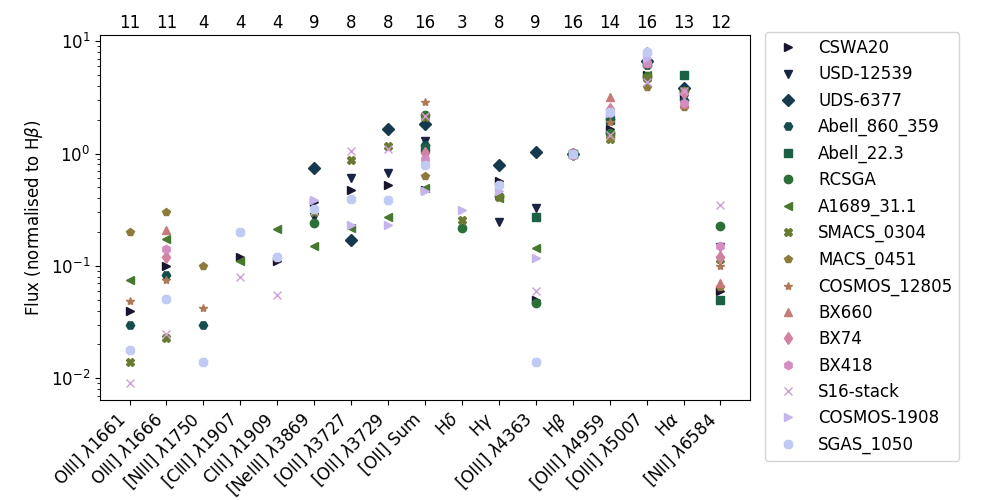

In [14]:
# Load data
fluxes = Table.read('data.dat',format='ascii.fixed_width_two_line')
gal = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')
gal.add_index('Name')

## colorsmap
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(fluxes['Name'])))

#count the number of each emission line
nb_gal = [0] * 17

#plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
fig.subplots_adjust(top=0.93,bottom=0.2,right=0.75,left=0.1)

for k,f in enumerate(fluxes):
    for i,line in enumerate(line_names):
        if np.isfinite(f[line]): 
            nb_gal[i] += 1
        ax.plot(i,f[line]/f['Hb'],color=colors[gal.loc[f['Name']]['nb']],marker=gal.loc[f['Name']]['marker'] )
    ax.plot(0,np.nan,label=f['Name'],marker=gal.loc[f['Name']]['marker'],color=colors[gal.loc[f['Name']]['nb']],linewidth=0)

#number of lines
for i,nb in enumerate(nb_gal):
    ax.annotate(nb,xy=(i,13),annotation_clip=False,ha='center') 

ax.set_yscale("log", nonposy='clip')
ax.set_xticks(np.arange(len(line_names)))

fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[NIII] $\lambda$1750','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] $\lambda$3727','[OII] $\lambda$3729',
                    '[OII] Sum','H$\delta$','H$\gamma$','[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']
ax.set_xticklabels(fancy_line_names, rotation = 45, ha="right")
ax.set_ylabel('Flux (normalised to H$\\beta$)')
plt.legend(bbox_to_anchor=(1.01, 1.03))

#plt.savefig('data.pdf')

### Main sequence 

<IPython.core.display.Javascript object>


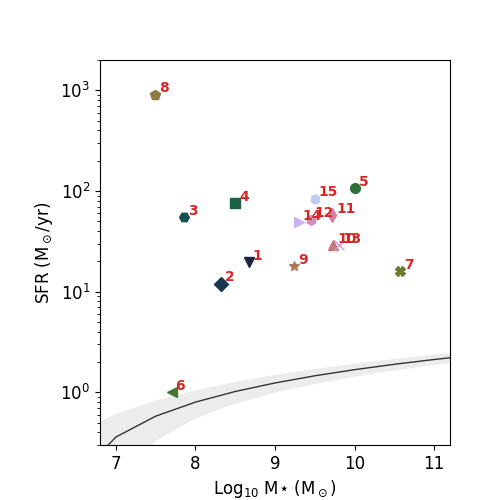

In [13]:
# Load data
sample = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')
sample.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(sample['Name'])))

# Plot data
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for gal in sample:
    ax.plot(gal['LogMass'],gal['SFR'],color=colors[gal['nb']],marker=gal['marker'],markersize=7)
    ax.annotate(gal['nb'],(gal['LogMass']+0.05,gal['SFR']*1.05),color='C3',fontsize=10,fontweight='bold')

# Plot relation from Whitaker 2012
def whitaker(z,mass):
    alpha = 0.70 - 0.13*z
    beta  = 0.38 + 1.14*z -0.19*z**2
    return np.array([alpha*(m - 10.5) + beta for m in mass])

mass_axis = np.arange(6.0,12.0,0.5)
disp = mass_axis*0 +0.25

z=2
ax.plot(mass_axis,whitaker(z,mass_axis),color='0.2',linestyle='-',linewidth=1)
ax.fill_between(mass_axis,whitaker(z,mass_axis)+disp,whitaker(z,mass_axis)-disp,
                       color='0.3',alpha=0.1,lw=0)
ax.set_yscale("log", nonposy='clip')
ax.set_xlabel('Log$_{10}$ M$\star$ (M$_\odot$)')
ax.set_ylabel('SFR (M$_\odot$/yr)')
ax.set_xlim(6.8,11.2)
ax.set_ylim(0.3,2*10**3)
#plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.savefig('/Users/vera/Desktop/main_sequence.pdf')

### BPT diagram
(the classic BPT diagram): [O iii]/Hb or/and [N ii]/Ha

<IPython.core.display.Javascript object>


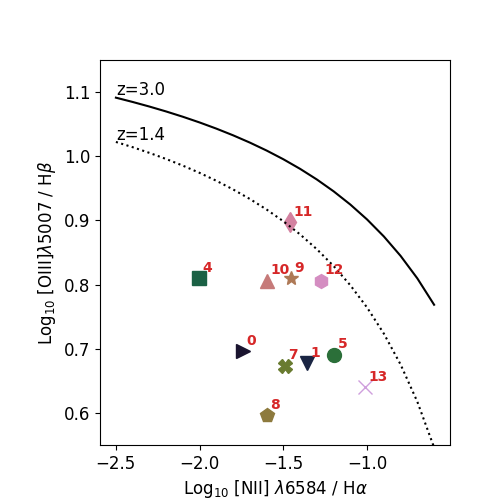

In [14]:
# Load data
fluxes = Table.read('data.dat',format='ascii.fixed_width_two_line')
#fluxes.remove_rows([5,12,15])
sample = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')
sample.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(sample['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for gal in fluxes:
    nb = sample.loc[gal['Name']]['nb']
    ax.plot(np.log10(gal['NII6584']/gal['Ha']),np.log10(gal['OIII5007']/gal['Hb']),
            color=colors[nb],marker=sample.loc[gal['Name']]['marker'],markersize=10)
    ax.annotate(nb,(np.log10(gal['NII6584']/gal['Ha'])+0.02,np.log10(gal['OIII5007']/gal['Hb'])+0.01),
                   color='C3',fontsize=10,fontweight='bold')

    
# Kewley+13 
def BPT(nii_ha,z):
    return 0.61/(nii_ha - 0.02 - 0.1833 * z) +1.2 + 0.03 *z

ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=1.4),color='k',linestyle=':')
ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=3.0),color='k')
ax.annotate('z=1.4',xy=(-2.5,1.025))
ax.annotate('z=3.0',xy=(-2.5,1.095))


ax.set_ylabel('Log$_{10}$ [OIII]$ \lambda$5007 / H$\\beta$')
ax.set_xlabel('Log$_{10}$ [NII] $\lambda$6584 / H$\\alpha$')
ax.set_ylim(0.55,1.15)#
#plt.savefig('/Users/vera/Desktop/BPT.pdf')

### BPT with rederenned fluxes

<IPython.core.display.Javascript object>


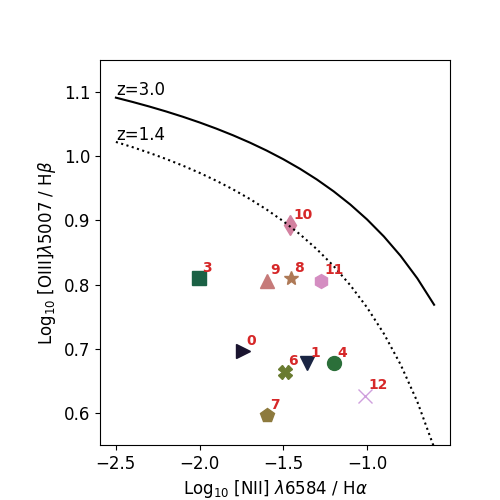

In [17]:
# Load data
fluxes = Table.read('../TeMethod/data_dered.dat',format='ascii.fixed_width_two_line')
#fluxes.remove_rows([5,12,15])
sample = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')
sample.add_index('Name')

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, len(sample['Name'])))

#plotting
fig, ax = plt.subplots(1,1,figsize=(5,5))
fig.subplots_adjust(left=0.2)
for k,gal in enumerate(fluxes):
    ax.plot(np.log10(gal['NII6584']/gal['Ha']),np.log10(gal['OIII5007']/gal['Hb']),
            color=colors[sample.loc[gal['Name']]['nb']],marker=sample.loc[gal['Name']]['marker'],markersize=10)
    ax.annotate(k,(np.log10(gal['NII6584']/gal['Ha'])+0.02,np.log10(gal['OIII5007']/gal['Hb'])+0.01),
                   color='C3',fontsize=10,fontweight='bold')

    
# Kewley+13 
def BPT(nii_ha,z):
    return 0.61/(nii_ha - 0.02 - 0.1833 * z) +1.2 + 0.03 *z

ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=1.4),color='k',linestyle=':')
ax.plot(np.arange(-2.5,-0.5,0.1),BPT(np.arange(-2.5,-0.5,0.1),z=3.0),color='k')
ax.annotate('z=1.4',xy=(-2.5,1.025))
ax.annotate('z=3.0',xy=(-2.5,1.095))


ax.set_ylabel('Log$_{10}$ [OIII]$ \lambda$5007 / H$\\beta$')
ax.set_xlabel('Log$_{10}$ [NII] $\lambda$6584 / H$\\alpha$')
ax.set_ylim(0.55,1.15)#
plt.savefig('/Users/vera/Desktop/BPT.pdf')

# Further data massaging

## Deal with missing error bars in emission lines and normalise to Hb

These are only for the table in the paper and not actually for computation

In [18]:
# Load data
fluxes = Table.read('data.dat',format='ascii.fixed_width_two_line')

for k,gal in enumerate(fluxes):
    for i,line in enumerate(line_names):
        if np.isfinite(gal[line]) and np.isnan(gal['e'+line]): 
            gal['e'+line] = 0
            print("Updated",gal['Name'],line)

fluxes.write('data_all_errorbars.dat',format='ascii.fixed_width_two_line')

('Updated', 'Abell_860_359', 'OIII1661')
('Updated', 'Abell_860_359', 'NIII1750')
('Updated', 'Abell_860_359', 'OIITot')
('Updated', 'Abell_22.3', 'NII6584')
('Updated', 'RCSGA', 'OIII4363')
('Updated', 'MACS_0451', 'NIII1750')
('Updated', 'MACS_0451', 'OIITot')
('Updated', 'MACS_0451', 'NII6584')
('Updated', 'COSMOS_12805', 'NIII1750')
('Updated', 'COSMOS_12805', 'OIITot')
('Updated', 'COSMOS_12805', 'NII6584')
('Updated', 'BX660', 'NII6584')
('Updated', 'S16-stack', 'OIII4363')
('Updated', 'SGAS_1050', 'OIII4363')


<IPython.core.display.Javascript object>


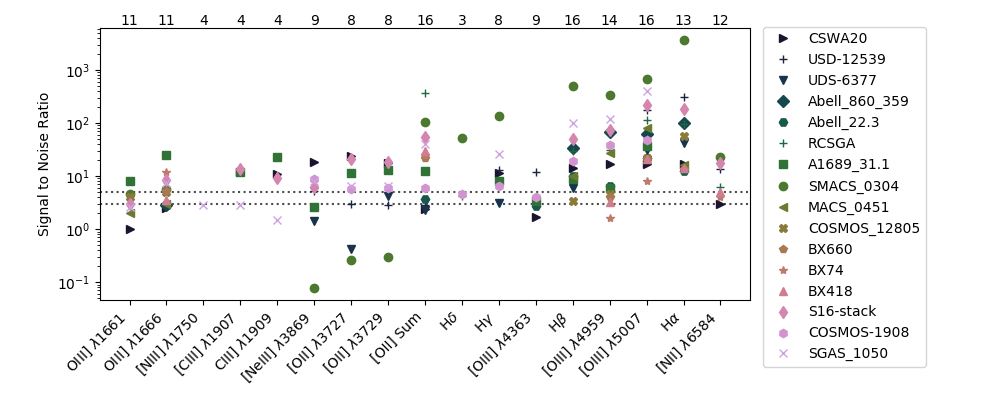

In [102]:
## Signal to noise evaluation
plt.rcParams.update({'font.size': 10})

## colors and markers
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
fluxes = Table.read('data.dat',format='ascii.fixed_width_two_line')

#count the number of each emission line
nb_gal = [0] * 17

#plotting
fig, ax = plt.subplots(1,1,figsize=(10,4))
fig.subplots_adjust(top=0.93,bottom=0.25,right=0.75,left=0.1)
ax.axhline(3,linestyle=':',linewidth=1.5,color='0.3')
ax.axhline(5,linestyle=':',linewidth=1.5,color='0.3')
for k,gal in enumerate(fluxes):
    for i,line in enumerate(line_names):
        if np.isfinite(gal[line]): 
            nb_gal[i] += 1
        ax.plot(i,gal[line]/gal['e'+line],color=colors[k],marker=markers[k])
    ax.plot(0,np.nan,label=gal['Name'],marker=markers[k],color=colors[k],linewidth=0)

#number of lines
for i,nb in enumerate(nb_gal):
    ax.annotate(nb,xy=(i,7000),annotation_clip=False,ha='center') 

#axis
fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[NIII] $\lambda$1750','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] $\lambda$3727','[OII] $\lambda$3729',
                    '[OII] Sum','H$\delta$','H$\gamma$','[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']
ax.set_yscale("log", nonposy='clip')
ax.set_xticks(np.arange(len(line_names)))
ax.set_xticklabels(fancy_line_names, rotation = 45, ha="right")
ax.set_ylabel('Signal to Noise Ratio')
plt.legend(bbox_to_anchor=(1.01, 1.03))

plt.savefig('/Users/vera/Desktop/signal_to_noise.pdf')

<IPython.core.display.Javascript object>


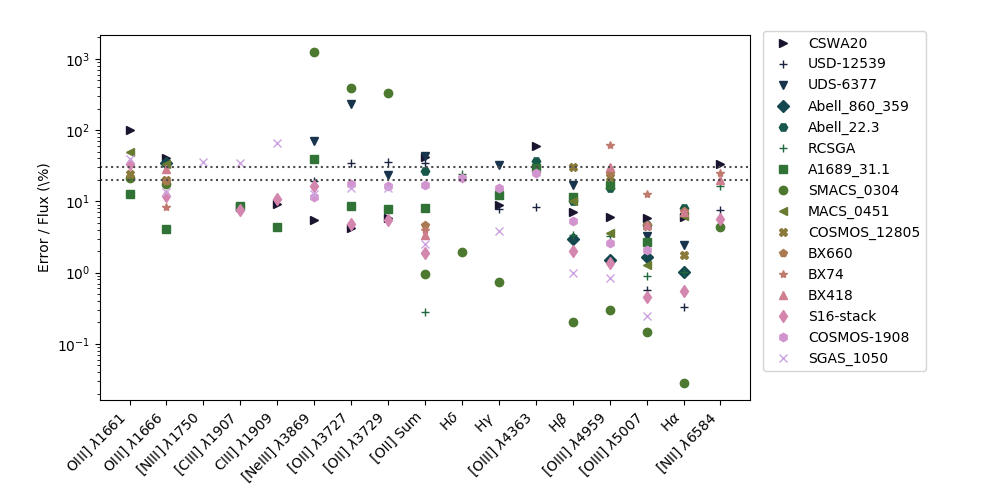

In [103]:
## what is the typical error?
colors = plt.get_cmap('cubehelix')(np.linspace(0.1, 0.8, 18))
markers = ('>','+','v','D','H','+','s','o','<','X','p','*','^','d','h','x','8','>','+')

# Load data
fluxes = Table.read('data.dat',format='ascii.fixed_width_two_line')


#plotting
fig, ax = plt.subplots(1,1,figsize=(10,5))
fig.subplots_adjust(top=0.93,bottom=0.2,right=0.75,left=0.1)
for k,gal in enumerate(fluxes):
    for i,line in enumerate(line_names):
        ax.plot(i,gal['e'+line]/gal[line]*100,color=colors[k],marker=markers[k])
    ax.plot(0,np.nan,label=gal['Name'],marker=markers[k],color=colors[k],linewidth=0)

# some guiding lines
ax.axhline(20,linestyle=':',linewidth=1.5,color='0.3')
ax.axhline(30,linestyle=':',linewidth=1.5,color='0.3')
ax.set_yscale("log", nonposy='clip')
ax.set_xticks(np.arange(len(line_names)))

fancy_line_names = ['OIII] $\lambda$1661','OIII] $\lambda$1666','[NIII] $\lambda$1750','[CIII] $\lambda$1907',
                    'CIII] $\lambda$1909','[NeIII] $\lambda$3869','[OII] $\lambda$3727','[OII] $\lambda$3729',
                    '[OII] Sum','H$\delta$','H$\gamma$','[OIII] $\lambda$4363','H$\\beta$','[OIII] $\lambda$4959',
                    '[OIII] $\lambda$5007','H$\\alpha$','[NII] $\lambda$6584']
ax.set_xticklabels(fancy_line_names, rotation = 45, ha="right")
ax.set_ylabel('Error / Flux (\%)')
plt.legend(bbox_to_anchor=(1.01, 1.03))

### Correct for galactic redenning

Uses Schlegel et al. (1998) redennig with extinction curve in Fitzpatrick (1999) with RV =3.1

We use the dustmaps package  to perform this correction (see http://dustmaps.readthedocs.io/en/latest/maps.html)

Values of E(B-V) with bayestar2017 are basically the same up to th 5th decimal

In [104]:
from astropy.coordinates import SkyCoord
from dustmaps.sfd import SFDWebQuery
import pyneb as pn 

# Data
galaxies = Table.read('galaxy_properties.dat',format='ascii.fixed_width_two_line')
fluxes = Table.read('data_all_errorbars.dat',format='ascii.fixed_width_two_line')

# Extinction law
rc = pn.RedCorr(law='F99')
rc.R_V = 3.1 
sfd = SFDWebQuery()

for gal,f in zip(galaxies,fluxes):
    
    # Extinction
    if gal['RaDec'] != "None": # Steidel composit
       
        c = SkyCoord(gal['RaDec'], frame='icrs')
        ebv_sfd = sfd(c)
        rc.E_BV = ebv_sfd

        # Derened fluxes
        for line in line_names:
            f[line] = f[line] * rc.getCorrHb(super_wav[line])
        
        print(gal["Name"],f['Name'],ebv_sfd)

    else:
        print(gal["Name"],f['Name'],ebv_sfd)
    
fluxes.write('data_corrected_gal_ext.dat',format='ascii.fixed_width_two_line')
fluxes.show_in_notebook()

('CSWA20', 'CSWA20', 0.02212195098400116)
('UDS-6377', 'USD-12539', 0.022932879626750946)
('Abell_860_359', 'UDS-6377', 0.026844874024391174)
('Abell_22.3', 'Abell_860_359', 0.027951598167419434)
('RCSGA', 'Abell_22.3', 0.07839655131101608)
('A1689_31.1', 'RCSGA', 0.027183787897229195)
('SMACS_0304', 'A1689_31.1', 0.014715873636305332)
('MACS_0451', 'SMACS_0304', 0.07583940774202347)
('COSMOS_12805', 'MACS_0451', 0.02958659827709198)
('BX660', 'COSMOS_12805', 0.036611657589673996)
('BX74', 'BX660', 0.027424555271863937)
('BX418', 'BX74', 0.03695440664887428)
('S16-stack', 'BX418', 0.03695440664887428)
('COSMOS-1908', 'S16-stack', 0.01873968355357647)
('SGAS_1050', 'COSMOS-1908', 0.044404286891222)


idx,Name,z,Ref,OIII1661,OIII1666,NIII1750,CIII1907,CIII1909,NeIII3869,OII3727,OII3729,OIITot,Hd,Hg,OIII4363,Hb,OIII4959,OIII5007,Ha,NII6584,eOIII1661,eOIII1666,eNIII1750,eCIII1907,eCIII1909,eNeIII3869,eOII3727,eOII3729,eOIITot,eHd,eHg,eOIII4363,eHb,eOIII4959,eOIII5007,eHa,eNII6584
0,CSWA20,1.433,James2014,0.0434525752364,0.10862115928,nan,0.131226518517,0.120312721405,0.376977683506,0.480178907505,0.531240750831,0.480159909405,nan,0.575804488049,0.0504880840145,1.00000678047,1.66668386844,4.95534425697,3.2359746879,0.0584678697945,0.04,0.04,nan,0.01,0.01,0.02,0.02,0.03,0.2,nan,0.05,0.03,0.07,0.1,0.29,0.2,0.02
1,USD-12539,1.621,Maseda2014,nan,nan,nan,nan,nan,3.35500400636e-17,7.51720767715e-17,8.27073841812e-17,1.57876377775e-16,nan,2.96760629066e-17,3.99780765823e-17,1.2036184602e-16,nan,5.70694168902e-16,3.9696063424e-16,1.7431639751e-17,nan,nan,nan,nan,nan,6.27673e-18,2.50988e-17,2.89959e-17,5.40947e-17,nan,2.29637e-18,3.30824e-18,3.69689e-18,nan,3.2338e-18,1.32121e-18,1.34166e-18
2,UDS-6377,1.664,Maseda2014,nan,nan,nan,nan,nan,3.86580841513e-18,8.79631009634e-19,8.60059465022e-18,9.48018342765e-18,nan,4.03524924514e-18,5.29207837143e-18,5.03661144126e-18,nan,3.32490319924e-17,1.87499692956e-17,-1.86116208514e-18,nan,nan,nan,nan,nan,2.63884e-18,1.98861e-18,1.96377e-18,3.95238e-18,nan,1.27652e-18,1.5429e-18,8.57792e-19,nan,1.07353e-18,4.66379e-19,7.42037e-19
3,Abell_860_359,1.702,Stark2014,0.0333082564234,0.0921418255036,0.0332906862275,nan,nan,nan,nan,nan,1.23286890118,nan,nan,nan,1.00000856729,2.0249080886,6.09720617573,2.87534317925,nan,0.015,0.029,0.015,nan,nan,nan,nan,nan,0.6,nan,nan,nan,0.03,0.03,0.1,0.03,nan
4,Abell_22.3,1.703,Yuan2009,nan,nan,nan,nan,nan,nan,nan,nan,1.19739725073,nan,nan,0.279456875895,1.00002402908,1.96610185428,6.38284857756,4.5931917951,0.0456203519952,nan,nan,nan,nan,nan,nan,nan,nan,0.3,nan,nan,0.1,0.1,0.3,0.3,0.4,0.025
5,RCSGA,1.7037,Rigby2011,nan,nan,nan,nan,nan,7.98114327167,nan,nan,73.9172461035,7.22671951496,13.6691273109,1.51801299503,32.4002699552,49.1797320184,158.424045109,112.402929452,7.1684826121,nan,nan,nan,nan,nan,1.3,nan,nan,0.2,1.7,2.0,0.75,1.1,1.6,1.4,1.2,1.2
6,A1689_31.1,1.8,"Christensen2012a,b",3.38117903905,7.81848436727,nan,4.98809922221,9.65897051786,6.48003692862,9.33206614786,11.867641333,21.1994618684,nan,17.1149643052,6.24019497229,42.7001925971,62.9167540883,211.084913078,nan,nan,0.4,0.3,nan,0.4,0.4,2.5,0.8,0.9,1.7,nan,2.1,1.8,4.9,10.6,5.7,nan,nan
7,SMACS_0304,1.963,"Christensen2012a,b",0.0185948337603,0.0305387471193,nan,nan,nan,0.319630418198,0.942337134932,1.26373987148,2.25975283559,0.2700022145,0.426561969815,nan,1.00002324528,1.32990673062,4.66651493304,3.30079286012,0.10615615663,0.003,0.004,nan,nan,nan,3.8,3.4,3.9,0.02,0.005,0.003,nan,0.002,0.004,0.007,0.001,0.005
8,MACS_0451,2.06,Stark2014,0.223417948366,0.335084513223,0.111646601495,nan,nan,nan,nan,nan,0.648280063636,nan,nan,nan,1.00000906843,1.36636284448,3.93442945212,2.49304502463,0.0627897388528,0.1,0.1,0.05,nan,nan,nan,nan,nan,0.315,nan,nan,nan,0.1,0.05,0.05,0.16,0.0325
9,COSMOS_12805,2.159,Kojima2017,0.0561955856868,0.0860001825023,0.0481343668627,nan,nan,nan,nan,nan,3.00448215726,nan,nan,nan,1.00001122165,1.88379287533,6.42850365356,2.72203286519,0.095809340633,0.012,0.015,0.021,nan,nan,nan,nan,nan,1.45,nan,nan,nan,0.3,0.42,0.29,0.05,0.05
